In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("GoogleAdsData.csv")
dfCopy=df.copy()

In [3]:
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic


In [4]:
df.tail()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
2595,A3595,DataAnalyticsCourse,88.0,5344.0,$242.07,17.0,9.0,0.054,$1418,29-11-2024,HYDERABAD,MOBILE,online data analytic
2596,A3596,DataAnalyticsCourse,154.0,3211.0,$248.28,14.0,6.0,0.039,$1950,2024/11/28,hyderabad,TABLET,data analitics online
2597,A3597,Data Anlytics Corse,113.0,3808.0,$233.25,18.0,4.0,0.035,$1085,2024-11-02,Hyderbad,desktop,data anaytics training
2598,A3598,Data Analytics Corse,196.0,5853.0,$220.13,16.0,7.0,0.036,$1558,2024-11-08,hydrebad,Tablet,data anaytics training
2599,A3599,Data Analytics Corse,NaN,5453.0,NaN,12.0,5.0,NaN,$1174,2024/11/22,HYDERABAD,desktop,analytics for data


In [5]:
df.isnull().sum()

Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion Rate    626
Sale_Amount        139
Ad_Date              0
Location             0
Device               0
Keyword              0
dtype: int64

In [6]:
#dropped Ad_ID and Campaign_Name columns because of doesnt change anything
#also dropped "Conversion Rate" as a result of columns have high percentage of NaN value
df=df.drop(["Ad_ID","Campaign_Name","Conversion Rate","Location","Keyword"],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       2488 non-null   float64
 1   Impressions  2546 non-null   float64
 2   Cost         2503 non-null   object 
 3   Leads        2552 non-null   float64
 4   Conversions  2526 non-null   float64
 5   Sale_Amount  2461 non-null   object 
 6   Ad_Date      2600 non-null   object 
 7   Device       2600 non-null   object 
dtypes: float64(4), object(4)
memory usage: 162.6+ KB


In [8]:
for convertColumns in ["Sale_Amount","Cost"]:
    df[convertColumns]=df[convertColumns].str.replace("$","")
    df[convertColumns]=pd.to_numeric(df[convertColumns])
for x in ["Clicks","Impressions","Cost","Leads","Conversions","Sale_Amount"]:
    df[x]=df[x].fillna(df[x].mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       2600 non-null   float64
 1   Impressions  2600 non-null   float64
 2   Cost         2600 non-null   float64
 3   Leads        2600 non-null   float64
 4   Conversions  2600 non-null   float64
 5   Sale_Amount  2600 non-null   float64
 6   Ad_Date      2600 non-null   object 
 7   Device       2600 non-null   object 
dtypes: float64(6), object(2)
memory usage: 162.6+ KB


In [10]:
df["Device"]=df["Device"].str.lower()

In [11]:
#i copied this part from Sahil Islam007, pls check his profile from kaggle for more models
#ill try improve this part later
from dateutil import parser

# Step 1: Clean and standardize text
df['Ad_Date'] = df['Ad_Date'].astype(str).str.strip()

# Step 2: Define a safe parse function
def safe_parse(date_str):
    try:
        # Try parsing each date, allow mixed formats
        return parser.parse(date_str, dayfirst=True).date()
    except Exception:
        return pd.NaT

# Step 3: Apply parsing
df['Ad_Date'] = df['Ad_Date'].apply(safe_parse)

# Step 4: Convert to YYYY-MM-DD string
df['Ad_Date'] = df['Ad_Date'].astype(str)
df["Ad_Date"]=pd.to_datetime(df["Ad_Date"])
df["Year"]=df["Ad_Date"].dt.year
df["Month"]=df["Ad_Date"].dt.month
df["Day"]=df["Ad_Date"].dt.day
df.drop(columns=["Ad_Date"],inplace=True)

In [12]:
df.head(5)

,Clicks,Impressions,Cost,Leads,Conversions,Sale_Amount,Device,Year,Month,Day
0,104.0,4498.0,231.88,14.0,7.0,1892.0,desktop,2024,11,16
1,173.0,5107.0,216.84,10.0,8.0,1679.0,mobile,2024,11,20
2,90.0,4544.0,203.66,26.0,9.0,1624.0,desktop,2024,11,16
3,142.0,3185.0,237.66,17.0,6.0,1225.0,tablet,2024,11,26
4,156.0,3361.0,195.90,30.0,8.0,1091.0,desktop,2024,11,22


In [13]:
df.isnull().sum()

Clicks         0
Impressions    0
Cost           0
Leads          0
Conversions    0
Sale_Amount    0
Device         0
Year           0
Month          0
Day            0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       2600 non-null   float64
 1   Impressions  2600 non-null   float64
 2   Cost         2600 non-null   float64
 3   Leads        2600 non-null   float64
 4   Conversions  2600 non-null   float64
 5   Sale_Amount  2600 non-null   float64
 6   Device       2600 non-null   object 
 7   Year         2600 non-null   int32  
 8   Month        2600 non-null   int32  
 9   Day          2600 non-null   int32  
dtypes: float64(6), int32(3), object(1)
memory usage: 172.8+ KB


In [15]:
df["Backup Device"]=df["Device"]
df=pd.get_dummies(df,columns=["Device"])

In [16]:
df

,Clicks,Impressions,Cost,Leads,Conversions,Sale_Amount,Year,Month,Day,Backup Device,Device_desktop,Device_mobile,Device_tablet
0,104.000000,4498.0,231.880000,14.0,7.0,1892.0,2024,11,16,desktop,True,False,False
1,173.000000,5107.0,216.840000,10.0,8.0,1679.0,2024,11,20,mobile,False,True,False
2,90.000000,4544.0,203.660000,26.0,9.0,1624.0,2024,11,16,desktop,True,False,False
3,142.000000,3185.0,237.660000,17.0,6.0,1225.0,2024,11,26,tablet,False,False,True
4,156.000000,3361.0,195.900000,30.0,8.0,1091.0,2024,11,22,desktop,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,88.000000,5344.0,242.070000,17.0,9.0,1418.0,2024,11,29,mobile,False,True,False
2596,154.000000,3211.0,248.280000,14.0,6.0,1950.0,2024,11,28,tablet,False,False,True
2597,113.000000,3808.0,233.250000,18.0,4.0,1085.0,2024,2,11,desktop,True,False,False
2598,196.000000,5853.0,220.130000,16.0,7.0,1558.0,2024,8,11,tablet,False,False,True


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Clicks          2600 non-null   float64
 1   Impressions     2600 non-null   float64
 2   Cost            2600 non-null   float64
 3   Leads           2600 non-null   float64
 4   Conversions     2600 non-null   float64
 5   Sale_Amount     2600 non-null   float64
 6   Year            2600 non-null   int32  
 7   Month           2600 non-null   int32  
 8   Day             2600 non-null   int32  
 9   Backup Device   2600 non-null   object 
 10  Device_desktop  2600 non-null   bool   
 11  Device_mobile   2600 non-null   bool   
 12  Device_tablet   2600 non-null   bool   
dtypes: bool(3), float64(6), int32(3), object(1)
memory usage: 180.4+ KB


# visualize the data

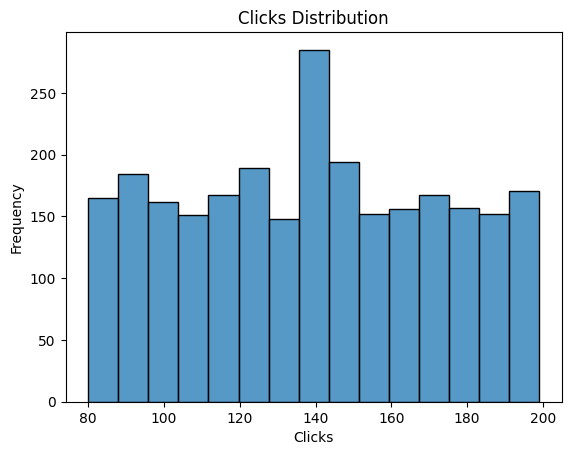

In [18]:
sns.histplot(df["Clicks"])
plt.title("Clicks Distribution")
plt.xlabel("Clicks")
plt.ylabel("Frequency")
plt.show()

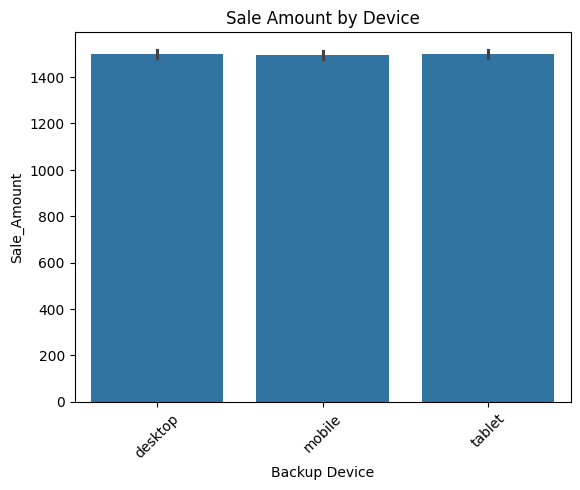

In [19]:
sns.barplot(x="Backup Device", y="Sale_Amount", data=df)
plt.title("Sale Amount by Device")
plt.xticks(rotation=45)
plt.show()

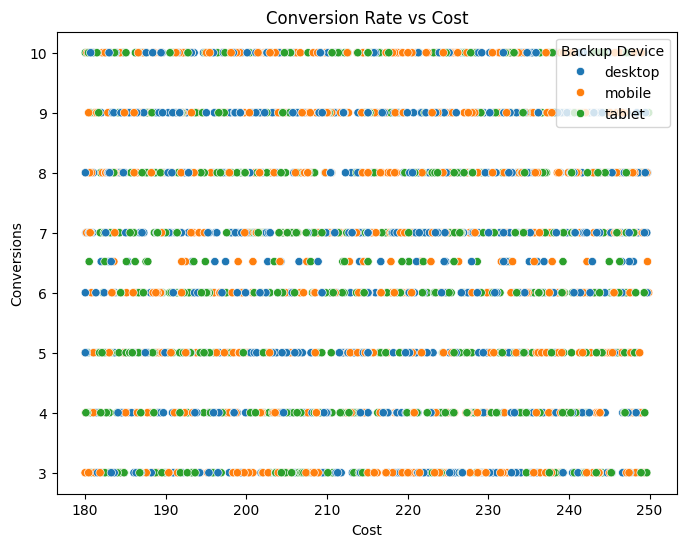

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Cost", y="Conversions", hue="Backup Device", data=df)
plt.title("Conversion Rate vs Cost")
plt.show()


In [21]:
df=df.drop(["Backup Device"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Clicks          2600 non-null   float64
 1   Impressions     2600 non-null   float64
 2   Cost            2600 non-null   float64
 3   Leads           2600 non-null   float64
 4   Conversions     2600 non-null   float64
 5   Sale_Amount     2600 non-null   float64
 6   Year            2600 non-null   int32  
 7   Month           2600 non-null   int32  
 8   Day             2600 non-null   int32  
 9   Device_desktop  2600 non-null   bool   
 10  Device_mobile   2600 non-null   bool   
 11  Device_tablet   2600 non-null   bool   
dtypes: bool(3), float64(6), int32(3)
memory usage: 160.1 KB


# prepare the data

In [22]:
from sklearn.model_selection import train_test_split
y=df["Sale_Amount"]
x=df.drop(["Sale_Amount"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=44)
backup_ytest=y_test

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler_x=MinMaxScaler()
x_train=scaler_x.fit_transform(x_train)
x_test=scaler_x.transform(x_test)
print("x_train min/max value: " + str(x_train.min()) + "/" + str(x_train.max()))

scaler_y=MinMaxScaler()
y_train=scaler_y.fit_transform(y_train.values.reshape(-1,1)).flatten()
y_test=scaler_y.transform(y_test.values.reshape(-1,1)).flatten()

x_train min/max value: 0.0/1.0


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])



In [26]:
model.fit(x=x_train,y=y_train,epochs=300,validation_data=(x_test,y_test),verbose=1)

Epoch 1/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8136 - mae: 1.0447 - val_loss: 0.1314 - val_mae: 0.2998
Epoch 2/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.4928 - mae: 0.5697 - val_loss: 0.1253 - val_mae: 0.2941
Epoch 3/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.3313 - mae: 0.4572 - val_loss: 0.1310 - val_mae: 0.3009
Epoch 4/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2255 - mae: 0.3790 - val_loss: 0.1116 - val_mae: 0.2810
Epoch 5/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.2212 - mae: 0.3723 - val_loss: 0.1052 - val_mae: 0.2736
Epoch 6/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1754 - mae: 0.3374 - val_loss: 0.1002 - val_mae: 0.2673
Epoch 7/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.1583 - mae: 0.3212 - val_loss: 0.0967 - val_mae: 0.2620
Epoch 8/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1449 - mae: 0.3056 - val_loss: 0.0921 - val_mae: 0.2563
Epoch 9/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step

In [27]:
lossDf=pd.DataFrame(model.history.history)

<Axes: >

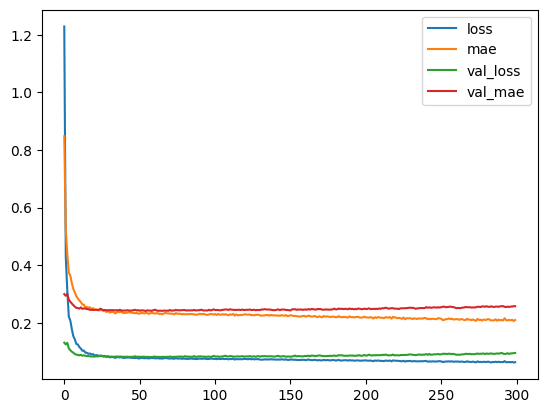

In [28]:
lossDf.plot()

In [29]:
y_pred_scaled = model.predict(x_test)
y_pred_original = scaler_y.inverse_transform(y_pred_scaled)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_scaled = model.predict(x_test)

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = y_test.reshape(-1, 1)

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MAE     : {mae:.2f}")
print(f"MSE     : {mse:.2f}")
print(f"RMSE    : {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
MAE     : 1492.89
MSE     : 2245564.58
RMSE    : 1498.52
R² Score: -27796997.3732


In [31]:
predictDf = pd.DataFrame({
    "Actual": backup_ytest.values.reshape(-1),         
    "Predicted": y_pred.reshape(-1)       
})

print(predictDf.head(10))


        Actual    Predicted
0  1218.000000  1485.250244
1  1498.648111  1474.536133
2  1083.000000  1567.578125
3  1239.000000  1505.409668
4  1619.000000  1491.851562
5  1154.000000  1510.404297
6  1580.000000  1521.303711
7  1129.000000  1902.715454
8  1259.000000  1503.409668
9  1071.000000  1442.267456


<Axes: >

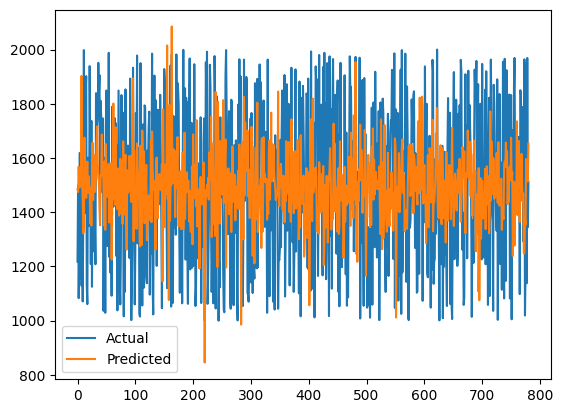

In [32]:
predictDf.plot()

as we can see model cant predict values properly, so dataset can be missleading or model can be improved with some changes